In [ ]:
pip install konlpy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 19.4 MB 880 kB/s 
     |████████████████████████████████| 453 kB 70.9 MB/s 


In [ ]:
pip install sentence_transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 85 kB 4.4 MB/s 
     |████████████████████████████████| 4.7 MB 74.3 MB/s 
     |████████████████████████████████| 1.3 MB 70.4 MB/s 
     |████████████████████████████████| 120 kB 65.2 MB/s 
     |████████████████████████████████| 6.6 MB 46.2 MB/s 
  Created wheel for sentence-transformers: filename=sentence_transformers-2.2.2-py3-none-any.whl size=125938 sha256=3156e076443597309f53f94b7b38b1e3b2c3052d93031717683ec62c9b1af5fa
  Stored in directory: /root/.cache/pip/wheels/bf/06/fb/d59c1e5bd1dac7f6cf61ec0036cc3a10ab8fecaa6b2c3d3ee9
Successfully built sentence-transformers


In [ ]:
pip install git+https://github.com/haven-jeon/PyKoSpacing.git

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://github.com/haven-jeon/PyKoSpacing.git to /tmp/pip-req-build-osait4x4
  Running command git clone -q https://github.com/haven-jeon/PyKoSpacing.git /tmp/pip-req-build-osait4x4
     |████████████████████████████████| 671.4 MB 1.9 kB/s 
     |████████████████████████████████| 463 kB 20.7 MB/s 
     |████████████████████████████████| 1.3 MB 64.7 MB/s 
  Created wheel for pykospacing: filename=pykospacing-0.5-py3-none-any.whl size=2268638 sha256=75552e9a71fd42e9cea5dd3ede434d02700b79093cbdb427919bb56aee4370af
  Stored in directory: /tmp/pip-ephem-wheel-cache-3lxsayzb/wheels/9b/93/81/a2a7dc8c66ede5bf30634d20635f32b95eac7ca2ea8844058b
Successfully built pykospacing
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.8.0
    Uninstalling tensorflow-estimator-2.8.0:
      Successfully uninstalled tensorflow-estimator-2.8.0
  Attempt

In [ ]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 20 not upgraded.
Need to get 9,604 kB of archives.
After this operation, 29.5 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 fonts-nanum all 20170925-1 [9,604 kB]
Fetched 9,604 kB in 1s (9,158 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletyp

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np

import pickle
from tqdm import tqdm
import math
from collections import Counter
import itertools

import seaborn as sns
import matplotlib.pyplot as plt
plt.rc('font', family='AppleGothic')
%matplotlib inline
import matplotlib as mpl
# 브라우저에서 바로 그려지도록 
%matplotlib inline

# 그래프에 retina display 적용
%config InlineBackend.figure_format = 'retina'

# Colab 의 한글 폰트 설정
plt.rc('font', family='NanumBarunGothic') 

# 유니코드에서  음수 부호설정
mpl.rc('axes', unicode_minus=False)
from wordcloud import WordCloud

import re
import urllib.request
from konlpy.tag import Okt, Komoran, Hannanum, Kkma
from nltk.tokenize import word_tokenize, sent_tokenize

from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer, TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.cluster import KMeans, DBSCAN
from sklearn.mixture import GaussianMixture

from pykospacing import Spacing

from sentence_transformers import SentenceTransformer

# 전처리

## 비상선언

In [ ]:
with open('/content/drive/Shareddrives/22-여름 NLP 프로젝트/NLP프로젝트_최종/비상선언_관객평점.pickle','rb') as fr:
    movie1 = pickle.load(fr)
with open("/content/drive/Shareddrives/22-여름 NLP 프로젝트/비상선언+외계인/비상선언_키워드3_v2.pickle","rb") as fr:
    movie1_pp = pickle.load(fr)

In [ ]:
text1 = movie1.copy()

text1['문장길이'] = text1['리뷰'].apply(lambda x: len(x.split()))
text1['키워드'] = ''
text1['키워드'] = movie1_pp['키워드TOP3_ highDIV'].apply(lambda x: ' '.join(x))
text1['키워드1'] = movie1_pp['키워드TOP3_ highDIV']

# 키워드가 없는 리뷰 제거
text1_na = text1[text1['키워드']==''].index
text1 = text1.drop(text1_na)

############################################################
# 비공감이 공감보다 많은 리뷰 제거 
text1_dis = text1[text1['비공감'] > text1['공감']].index
text1 = text1.drop(text1_dis)
############################################################

# 중복&문장길이 짧은거 제거
text1.drop_duplicates(['리뷰'],keep='last',inplace=True)
text1 = text1[text1['문장길이']>=5].reset_index(drop=True)
text1.drop('문장길이',axis=1,inplace=True)

text1

,평점,리뷰,공감,비공감,키워드,키워드1
0,1,고증 없는 막장 영화. 이건 정말 아닌듯,0,0,고증 없다 막장 정말 아니다 없다 막장 이건 이건 정말 아니다,"[고증 없다 막장, 정말 아니다, 없다 막장 이건, 이건 정말 아니다]"
1,1,아직도 이런 억지스러운 반일 반미 감정만 부추기는 영화들이 개봉하는게...답없다,0,0,아직도 이렇다 억지스럽다 감정 부추기다 반일 반미 반미 감정 부추기다,"[아직도 이렇다 억지스럽다, 감정 부추기다, 반일 반미, 반미 감정 부추기다]"
2,1,재난영화가 아니라 재난 그자체인 영화다. 내가 아는 한재림감독이 맞나? 동명이인?!,1,1,감독 맞다 동명이인 한재림 감독 재난 자체 재난영화 아니다 재난,"[감독 맞다 동명이인, 한재림 감독, 재난 자체, 재난영화 아니다 재난]"
3,1,감독의 저의가 궁금해진다배우들은 협박을 받고 출연한걸까?,3,2,배우 협박 받다 출연 걸다 협박 받다 출연 궁금하다 배우 협박,"[배우 협박 받다, 출연 걸다, 협박 받다 출연, 궁금하다 배우 협박]"
4,1,대가리가 얼마나 뭉개졌으면 이딴영화에 1점보다 높은점수를 줄수있는거지,3,2,높다 점수 거지 개다 따다 보다 높다 점수 대가리 개다 따다,"[높다 점수 거지, 개다 따다, 보다 높다 점수, 대가리 개다 따다]"
...,...,...,...,...,...,...
2922,5,뷔페라 앉자마자 이것저것 엄청 몰입해서 먹었는데 이제는 그만 먹고 싶은데 먹기 싫은...,3,1,남다 음식 먹다 임시 배우 배우 차기작 뷔페 앉다 엄청,"[남다 음식 먹다, 임시 배우, 배우 차기작, 뷔페 앉다 엄청]"
2923,5,좋아하는 배우들 나왔는데 스토리가 너무 별로였음 ㅜ ㅜ 소재는 좋았으나 억지 스토리...,4,0,별로 소재 좋다 억지 스토리 배우 나오다 스토리 배우 나오다,"[별로 소재 좋다, 억지 스토리, 배우 나오다 스토리, 배우 나오다]"
2924,5,그냥 평범한 한국 산업영화.. 개연성도 부족한거같아요 연기들은 휼룡했어요,348,139,부족하다 연기 휼룡했어 한국 산업 개연 개연 성도 평범하다 한국,"[부족하다 연기 휼룡했어, 한국 산업 개연, 개연 성도, 평범하다 한국]"
2925,5,한감독님 팬인데 데뷔작부터 승승장구해오다 결국 비상선언으로 비상선언하시고 내리막을 ...,4,2,데뷔 승승장구 해오다 부디 반등 기원 해오다 내리막 승승장구 해오다 내리막,"[데뷔 승승장구 해오다, 부디 반등 기원, 해오다 내리막, 승승장구 해오다 내리막]"


## 외계인

In [ ]:
with open('/content/drive/Shareddrives/22-여름 NLP 프로젝트/NLP프로젝트_최종/외계인_관객평점.pickle','rb') as fr:
    movie2 = pickle.load(fr)
with open("/content/drive/Shareddrives/22-여름 NLP 프로젝트/비상선언+외계인/외계인_키워드3_v2.pickle","rb") as fr:
    movie2_pp = pickle.load(fr)

In [ ]:
movie2_pp

,평점,리뷰,공감,비공감,키워드TOP3_ lowDIV,키워드TOP3_ highDIV,문장길이
0,1,이건 아니다아이가? 진짜 돈은아깝지않지만 시간은 아까워,2,1,"[진짜 아깝다 않다, 않다 아깝다, 진짜 아깝다, 아니다 진짜 아깝다]","[진짜 아깝다 않다, 진짜 아깝다, 않다 아깝다, 이건 아니다]",6
1,1,0점은 왜 줄수가 없나요,2,2,,,4
2,1,너무 재미없음 !! 감동도 재미도 없다,1,1,"[감동 재미 없다, 재미없다 감동 재미, 너무 재미없다 감동, 재미없다 감동]","[감동 재미 없다, 너무 재미없다, 재미없다 감동, 재미없다 감동 재미]",6
3,1,"보기 싫은 배우들, 뽀로로 수준의 ai 로봇 발성, 감독의 근자감. 감독은 수준 높...",4,0,"[한국 대표 비빔밥, 무리다 개밥 되어다, 로봇 발성, 무리다 개밥]","[한국 대표 비빔밥, 무리다 개밥 되어다, 로봇 발성, 감독 감독]",23
4,1,여자친구랑 첫데이트였는데 여자친구 잤습니다 더이상 말 필요한가요,3,1,"[친구 자다 필요하다, 데이트 친구 자다, 자다 필요하다, 여자친구 데이트 친구]","[친구 자다 필요하다, 여자친구 데이트, 데이트 친구, 데이트 친구 자다]",7
...,...,...,...,...,...,...,...
3828,5,정확한 평은 2편을 보고 판단 할 수 있을 듯ㅋ주성치의 서유기도 1편 월광보합만 보...,1,2,"[마무리 어떻다 되다, 작다 선리기연 보고, 마무리 어떻다, 판단 주성치]","[마무리 어떻다 되다, 월광보합 보다 작다, 서다 유기 월광보합, 판단 주성치]",26
3829,5,1부니까 재미가 2부에 더 집중되있을거라 생각하지만 그렇다고 해서 2부가 기대되진 ...,20,33,"[재미 집중 되다, 부가 기대다 않다, 재미 집중, 니까 재미]","[재미 집중 되다, 부가 기대다 않다, 니까 재미, 니까 재미 집중]",11
3830,5,초반에 늘어지다 후반에 몰아치는 딱 최동훈식 잡탕 영화,1,2,"[늘어지다 후반 몰아치다, 몰아치다 최동훈 잡탕, 후반 몰아치다 최동훈, 초반 늘어...","[늘어지다 후반 몰아치다, 최동훈 잡탕, 몰아치다 최동훈, 초반 늘어지다 후반]",8
3831,5,"아쉬운 상상력, 그러나 예전과 달리 가능성은 보인다",2,3,"[아쉽다 상상력 예전, 상상력 예전 달리, 아쉽다 상상력, 예전 달리 가능성]","[아쉽다 상상력 예전, 가능성 보이다, 예전 달리 가능성, 상상력 예전]",7


In [ ]:
text2 = movie2_pp.copy()

text2 = text2[text2['문장길이']>=5].reset_index(drop=True)
text2['키워드1'] = text2['키워드TOP3_ highDIV']
text2['키워드'] = text2['키워드TOP3_ highDIV'].apply(lambda x: ' '.join(x))
text2_na = text2[text2['키워드TOP3_ highDIV']==''].index
text2 = text2.drop(text2_na)

############################################################
text2_dis = text2[text2['비공감'] > text2['공감']].index
text2 = text2.drop(text2_dis)
############################################################

text2 = text2.drop(['키워드TOP3_ highDIV','키워드TOP3_ lowDIV','문장길이'],axis=1)
text2 = text2.reset_index(drop=True)

text2

,평점,리뷰,공감,비공감,키워드1,키워드
0,1,이건 아니다아이가? 진짜 돈은아깝지않지만 시간은 아까워,2,1,"[진짜 아깝다 않다, 진짜 아깝다, 않다 아깝다, 이건 아니다]",진짜 아깝다 않다 진짜 아깝다 않다 아깝다 이건 아니다
1,1,너무 재미없음 !! 감동도 재미도 없다,1,1,"[감동 재미 없다, 너무 재미없다, 재미없다 감동, 재미없다 감동 재미]",감동 재미 없다 너무 재미없다 재미없다 감동 재미없다 감동 재미
2,1,"보기 싫은 배우들, 뽀로로 수준의 ai 로봇 발성, 감독의 근자감. 감독은 수준 높...",4,0,"[한국 대표 비빔밥, 무리다 개밥 되어다, 로봇 발성, 감독 감독]",한국 대표 비빔밥 무리다 개밥 되어다 로봇 발성 감독 감독
3,1,여자친구랑 첫데이트였는데 여자친구 잤습니다 더이상 말 필요한가요,3,1,"[친구 자다 필요하다, 여자친구 데이트, 데이트 친구, 데이트 친구 자다]",친구 자다 필요하다 여자친구 데이트 데이트 친구 데이트 친구 자다
4,1,소지섭 류준열 김우빈 김태리 배우가 아까움 스토리 0 한국판 마블 짬뽕,9,12,"[한국판 마블 짬뽕, 소지섭 류준열, 마블 짬뽕, 배우 아깝다 스토리]",한국판 마블 짬뽕 소지섭 류준열 마블 짬뽕 배우 아깝다 스토리
...,...,...,...,...,...,...
1968,5,단 한순간의 긴장감도 없었다. 그냥 안타까울뿐...,50,46,"[그냥 안타깝다, 긴장감 없다 그냥, 순간 긴장감, 없다 그냥 안타깝다]",그냥 안타깝다 긴장감 없다 그냥 순간 긴장감 없다 그냥 안타깝다
1969,5,외계인에 대한 설정이 너무 아쉽네요. CG도 별로라 몰입을 방해함. 전체 스토리 설...,3,3,"[아쉽다 별로 몰입, 외계인 대한 설정, 스토리 설정, 안되다 아무]",아쉽다 별로 몰입 외계인 대한 설정 스토리 설정 안되다 아무
1970,5,다른건 다이해하겠는데 최동훈감독이 왜 이런 영화를 만든건지는 도무지 이해가 안간다,454,236,"[이렇다 만들다 건지다, 이해 최동훈 감독, 도무지 이해, 건지다 도무지 이해]",이렇다 만들다 건지다 이해 최동훈 감독 도무지 이해 건지다 도무지 이해
1971,5,배우들의 영화는 매우 훌륭했으나…영화가 다른 영화들의 비해 좀 평범했고 외계인의 c...,1,1,"[외계인 가다 별로, 각본 놀랍다, 비다 평범하다, 가다 별로 색다르다]",외계인 가다 별로 각본 놀랍다 비다 평범하다 가다 별로 색다르다


# 메인코드

## 비상선언

In [ ]:
var_score1 = []
var_score2 = []
var_score3 = []

tfidf_vect = TfidfVectorizer(ngram_range=(1,2))
feature_vect = tfidf_vect.fit_transform(text1['키워드'])

for i in tqdm(range(3,10)):
    km_cluster = KMeans(n_clusters=i, max_iter=10000, random_state=0)
    km_cluster.fit(feature_vect)
    cluster_label = km_cluster.labels_
    cluster_centers = km_cluster.cluster_centers_
    text1['label'] = cluster_label
    var_score1.append(sorted(text1['label'].value_counts().values)[-1]/text1['label'].value_counts().sum()*100) # 퍼진정도 1등
    var_score2.append(sorted(text1['label'].value_counts().values)[-2]/text1['label'].value_counts().sum()*100) # 퍼진정도 2등
    var_score3.append(sorted(text1['label'].value_counts().values)[-3]/text1['label'].value_counts().sum()*100) # 퍼진정도 3등

var_score1 = dict(zip(np.arange(3,10),var_score1))
score1_df = pd.DataFrame(list(var_score1.items()), columns=['iter', 'Ratio 4 1st'])
score1_df['Ratio 4 2nd'] = var_score2
score1_df['Ratio 4 3rd'] = var_score3
score1_df.set_index('iter', inplace=True)
score1_df
# pick 5

100%|██████████| 7/7 [00:04<00:00,  1.47it/s]


,Ratio 4 1st,Ratio 4 2nd,Ratio 4 3rd
iter,,,
3,75.093953,16.433208,8.472839
4,66.757772,15.203280,11.923471
5,60.744790,12.845917,11.342672
6,55.722583,11.240178,11.069354
7,55.278442,12.060130,10.044414
8,48.616331,11.991800,9.941920
9,42.944995,10.864366,9.873591


6번 cluster 선택

In [ ]:
tfidf_vect = TfidfVectorizer(ngram_range=(1,2))
feature_vect = tfidf_vect.fit_transform(text1['키워드'])

n_clusters=5
km_cluster = KMeans(n_clusters=n_clusters, max_iter=10000, random_state=0)
km_cluster.fit(feature_vect)
cluster_label = km_cluster.labels_
cluster_centers = km_cluster.cluster_centers_

text1['label'] = cluster_label
text1

,평점,리뷰,공감,비공감,키워드,키워드1,label
0,1,고증 없는 막장 영화. 이건 정말 아닌듯,0,0,고증 없다 막장 정말 아니다 없다 막장 이건 이건 정말 아니다,"[고증 없다 막장, 정말 아니다, 없다 막장 이건, 이건 정말 아니다]",0
1,1,아직도 이런 억지스러운 반일 반미 감정만 부추기는 영화들이 개봉하는게...답없다,0,0,아직도 이렇다 억지스럽다 감정 부추기다 반일 반미 반미 감정 부추기다,"[아직도 이렇다 억지스럽다, 감정 부추기다, 반일 반미, 반미 감정 부추기다]",0
2,1,재난영화가 아니라 재난 그자체인 영화다. 내가 아는 한재림감독이 맞나? 동명이인?!,1,1,감독 맞다 동명이인 한재림 감독 재난 자체 재난영화 아니다 재난,"[감독 맞다 동명이인, 한재림 감독, 재난 자체, 재난영화 아니다 재난]",0
3,1,감독의 저의가 궁금해진다배우들은 협박을 받고 출연한걸까?,3,2,배우 협박 받다 출연 걸다 협박 받다 출연 궁금하다 배우 협박,"[배우 협박 받다, 출연 걸다, 협박 받다 출연, 궁금하다 배우 협박]",2
4,1,대가리가 얼마나 뭉개졌으면 이딴영화에 1점보다 높은점수를 줄수있는거지,3,2,높다 점수 거지 개다 따다 보다 높다 점수 대가리 개다 따다,"[높다 점수 거지, 개다 따다, 보다 높다 점수, 대가리 개다 따다]",1
...,...,...,...,...,...,...,...
2922,5,뷔페라 앉자마자 이것저것 엄청 몰입해서 먹었는데 이제는 그만 먹고 싶은데 먹기 싫은...,3,1,남다 음식 먹다 임시 배우 배우 차기작 뷔페 앉다 엄청,"[남다 음식 먹다, 임시 배우, 배우 차기작, 뷔페 앉다 엄청]",2
2923,5,좋아하는 배우들 나왔는데 스토리가 너무 별로였음 ㅜ ㅜ 소재는 좋았으나 억지 스토리...,4,0,별로 소재 좋다 억지 스토리 배우 나오다 스토리 배우 나오다,"[별로 소재 좋다, 억지 스토리, 배우 나오다 스토리, 배우 나오다]",4
2924,5,그냥 평범한 한국 산업영화.. 개연성도 부족한거같아요 연기들은 휼룡했어요,348,139,부족하다 연기 휼룡했어 한국 산업 개연 개연 성도 평범하다 한국,"[부족하다 연기 휼룡했어, 한국 산업 개연, 개연 성도, 평범하다 한국]",0
2925,5,한감독님 팬인데 데뷔작부터 승승장구해오다 결국 비상선언으로 비상선언하시고 내리막을 ...,4,2,데뷔 승승장구 해오다 부디 반등 기원 해오다 내리막 승승장구 해오다 내리막,"[데뷔 승승장구 해오다, 부디 반등 기원, 해오다 내리막, 승승장구 해오다 내리막]",0


In [ ]:
text1['label'].value_counts()

0    1778
2     376
1     332
4     271
3     170
Name: label, dtype: int64

In [ ]:
# 단어 빈도 수 세어서 가장 빈도 높은 100개만 추출하는 함수 정의
def tokenizing(df):
    words = np.hstack(df['키워드1'].values)
    word_count = Counter(words)
    input = dict(word_count.most_common(100))
    return input

# 토크나이징된 data frame 넣으면 워드클라우드 그려주는 함수 정의
def wcdraw(df, color, title):  
  df2 = tokenizing(df)
  fontpath = "/content/drive/MyDrive/Colab Notebooks/SCDream6.otf"
  wordcloud = WordCloud(font_path=fontpath, max_words=100, colormap = color, width=900,height=500, background_color ='white')
  wordcloud = wordcloud.generate_from_frequencies(df2) # 빈도에 따라서 워드클라우드 시각화
  plt.figure(figsize = (15 , 10))
  plt.axis("off")
  plt.imshow(wordcloud)
  plt.title(title, fontsize=30)

In [ ]:
wcdraw(text1, 'Set2','전체키워드')
for i in range(n_clusters):
    wcdraw(text1[text1['label']==i], 'Set2', f'Group {i}')
    #################################################
    # 워드클라우드 밑에 텍스트 써놓았음
    #################################################

Output hidden; open in https://colab.research.google.com to view.

원래 쓰던 colormap인 purple을 쓰는 경우에는 빈도가 높아 큰 단어임에도 색깔이 너무 옅어서 눈에 확 띄지 않는 거 같아서 colormap을 바꾸어보았음  
그리고 비공감 > 공감을 처리해주어서인지 뭔가 GROUP 1 ~ 4까지 각 GROUP에서 뭘 나타내고 있는지가 눈에 더 확 띄는 거 같음  



1.   GROUP0 - 복합적
2.   GROUP1 - 다른 영화와의 비교, 최악이라는 키워드가 주를 이룸 -> 원색적 비난
3.   GROUP2 - 거의 배우어와 연기로만 이루어져있음 -> 배우와 연기는 좋지만 영화는 아쉽다
4.   GROUP3 - 거의 억지, 감동, 눈물로만 이루어져있음 -> 신파가 너무 심하다
5.   GROUP4 - 스토리, 전개, 개연 등의 단어가 주를 이룸 -> 스토리가 별로다



In [ ]:
text1['weight'] = ''

for i in range(len(text1)):
    text1['weight'][i] = 1+ (int(text1['공감'][i])-int(text1['비공감'][i]))*0.25

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [ ]:
weight_sum = []
for i in range(6):
     weight_sum.append(text1[text1['label']==i]['weight'].sum())

movie_dict = dict(zip(np.arange(n_clusters),weight_sum))

movie_df = pd.DataFrame(list(movie_dict.items()), columns=['Category', 'Grade'])
movie_df['Ratio'] = movie_df['Grade'].apply(lambda x: x/movie_df['Grade'].sum()*100)
########################################
movie_df['Cat_Mean'] = ['복합적', '원색적 비난', '배우에 못 미치는 영화에 대한 아쉬움', '신파', '스토리']
# 밑의 pie chart를 좀 더 예쁘게 시각화하기 위해 각 label의 의미를 column으로 추가
########################################
movie_df

,Category,Grade,Ratio,Cat_Mean
0,0,4827.00,63.306994,복합적
1,1,767.25,10.062625,원색적 비난
2,2,921.50,12.085642,배우에 못 미치는 영화에 대한 아쉬움
3,3,455.00,5.967409,신파
4,4,654.00,8.577330,스토리


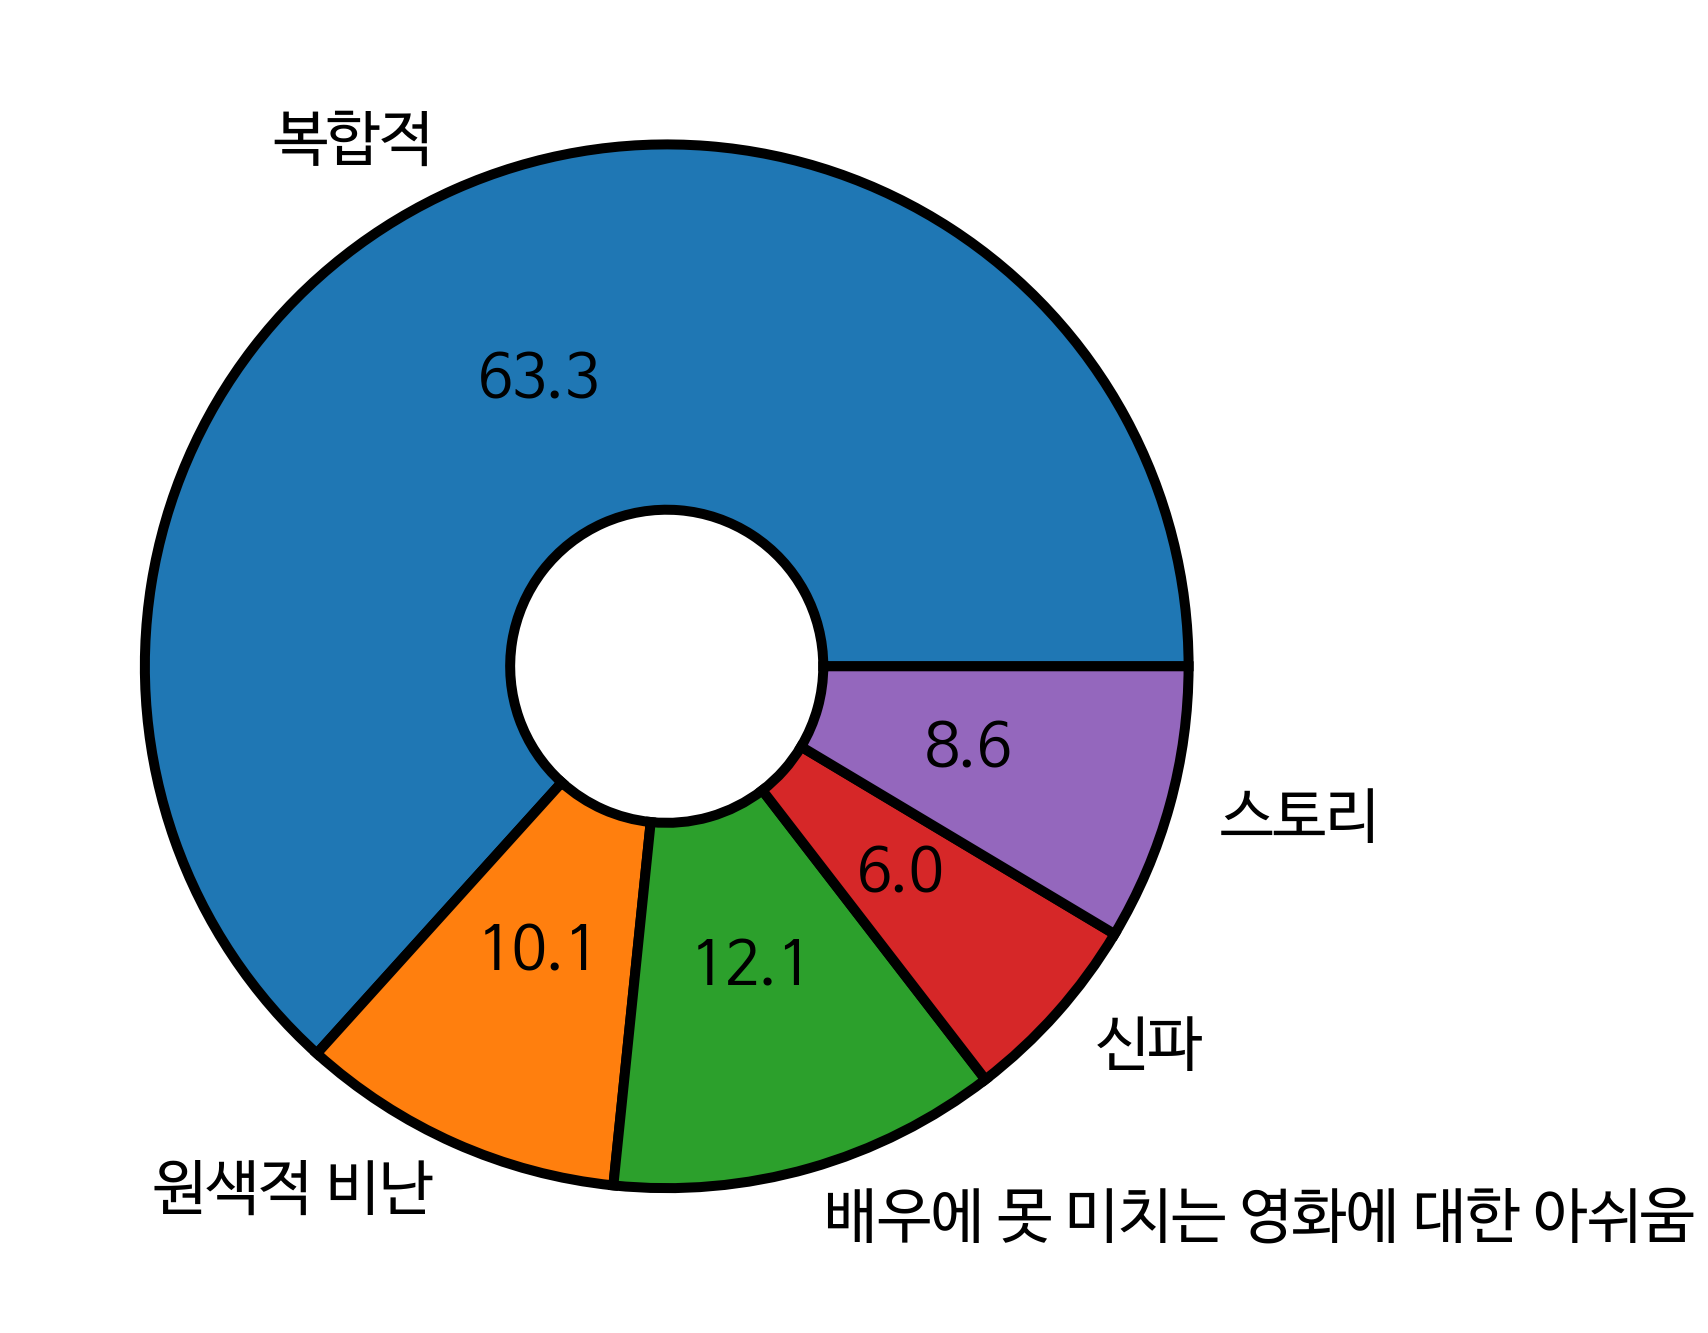

In [ ]:
ratio = movie_df['Ratio'].tolist()
########################################
labels = movie_df['Cat_Mean'].tolist()
# pie chart에 단순히 label 번호가 아닌 의미를 넣어 더 이해하기 쉽게 바꿨음
###################################################


plt.figure(figsize=(12,12))
#################################################
plt.pie(ratio, labels=labels, autopct='%.1f', wedgeprops={'width': 0.7, 'edgecolor': 'black', 'linewidth': 5}, textprops={'fontsize': 30, 'color':'k'})
# 민규가 font color를 w(흰색)으로 해서 라벨이 안 보이길래 k(black)으로 바꿈
#################################################
plt.show()

## 외계인

In [ ]:
text2

,평점,리뷰,공감,비공감,키워드1,키워드
0,1,이건 아니다아이가? 진짜 돈은아깝지않지만 시간은 아까워,2,1,"[진짜 아깝다 않다, 진짜 아깝다, 않다 아깝다, 이건 아니다]",진짜 아깝다 않다 진짜 아깝다 않다 아깝다 이건 아니다
1,1,너무 재미없음 !! 감동도 재미도 없다,1,1,"[감동 재미 없다, 너무 재미없다, 재미없다 감동, 재미없다 감동 재미]",감동 재미 없다 너무 재미없다 재미없다 감동 재미없다 감동 재미
2,1,"보기 싫은 배우들, 뽀로로 수준의 ai 로봇 발성, 감독의 근자감. 감독은 수준 높...",4,0,"[한국 대표 비빔밥, 무리다 개밥 되어다, 로봇 발성, 감독 감독]",한국 대표 비빔밥 무리다 개밥 되어다 로봇 발성 감독 감독
3,1,여자친구랑 첫데이트였는데 여자친구 잤습니다 더이상 말 필요한가요,3,1,"[친구 자다 필요하다, 여자친구 데이트, 데이트 친구, 데이트 친구 자다]",친구 자다 필요하다 여자친구 데이트 데이트 친구 데이트 친구 자다
4,1,소지섭 류준열 김우빈 김태리 배우가 아까움 스토리 0 한국판 마블 짬뽕,9,12,"[한국판 마블 짬뽕, 소지섭 류준열, 마블 짬뽕, 배우 아깝다 스토리]",한국판 마블 짬뽕 소지섭 류준열 마블 짬뽕 배우 아깝다 스토리
...,...,...,...,...,...,...
1968,5,단 한순간의 긴장감도 없었다. 그냥 안타까울뿐...,50,46,"[그냥 안타깝다, 긴장감 없다 그냥, 순간 긴장감, 없다 그냥 안타깝다]",그냥 안타깝다 긴장감 없다 그냥 순간 긴장감 없다 그냥 안타깝다
1969,5,외계인에 대한 설정이 너무 아쉽네요. CG도 별로라 몰입을 방해함. 전체 스토리 설...,3,3,"[아쉽다 별로 몰입, 외계인 대한 설정, 스토리 설정, 안되다 아무]",아쉽다 별로 몰입 외계인 대한 설정 스토리 설정 안되다 아무
1970,5,다른건 다이해하겠는데 최동훈감독이 왜 이런 영화를 만든건지는 도무지 이해가 안간다,454,236,"[이렇다 만들다 건지다, 이해 최동훈 감독, 도무지 이해, 건지다 도무지 이해]",이렇다 만들다 건지다 이해 최동훈 감독 도무지 이해 건지다 도무지 이해
1971,5,배우들의 영화는 매우 훌륭했으나…영화가 다른 영화들의 비해 좀 평범했고 외계인의 c...,1,1,"[외계인 가다 별로, 각본 놀랍다, 비다 평범하다, 가다 별로 색다르다]",외계인 가다 별로 각본 놀랍다 비다 평범하다 가다 별로 색다르다


In [ ]:
var_score1 = []
var_score2 = []
var_score3 = []

tfidf_vect = TfidfVectorizer(ngram_range=(1,2))
feature_vect = tfidf_vect.fit_transform(text2['키워드'])

for i in tqdm(range(3,10)):
    km_cluster = KMeans(n_clusters=i, max_iter=10000, random_state=0)
    km_cluster.fit(feature_vect)
    cluster_label = km_cluster.labels_
    cluster_centers = km_cluster.cluster_centers_
    text2['label'] = cluster_label
    var_score1.append(sorted(text2['label'].value_counts().values)[-1]/text2['label'].value_counts().sum()*100) # 퍼진정도 1등
    var_score2.append(sorted(text2['label'].value_counts().values)[-2]/text2['label'].value_counts().sum()*100) # 퍼진정도 2등
    var_score3.append(sorted(text2['label'].value_counts().values)[-3]/text2['label'].value_counts().sum()*100) # 퍼진정도 3등

var_score1 = dict(zip(np.arange(3,10),var_score1))
score2_df = pd.DataFrame(list(var_score1.items()), columns=['iter', 'Ratio 4 1st'])
score2_df['Ratio 4 2nd'] = var_score2
score2_df['Ratio 4 3rd'] = var_score3
score2_df.set_index('iter', inplace=True)
score2_df
####################################################
# pick 5
# 5개 cluster가 꽤나 고루게 잘 분포되어있어서 5개 cluster 선택
#################################################

100%|██████████| 7/7 [00:02<00:00,  2.61it/s]


,Ratio 4 1st,Ratio 4 2nd,Ratio 4 3rd
iter,,,
3,68.778510,20.527116,10.694374
4,61.023822,20.121642,10.846427
5,50.126711,20.881906,18.955905
6,59.503294,19.310694,8.819057
7,40.293969,20.983274,15.154587
8,52.965028,9.224531,7.754688
9,36.594019,13.076533,12.873796


In [ ]:
tfidf_vect = TfidfVectorizer(ngram_range=(1,2))
feature_vect = tfidf_vect.fit_transform(text2['키워드'])

n_clusters=5
km_cluster = KMeans(n_clusters=n_clusters, max_iter=10000, random_state=0)
km_cluster.fit(feature_vect)
cluster_label = km_cluster.labels_
cluster_centers = km_cluster.cluster_centers_

text2['label'] = cluster_label
text2.head()

,평점,리뷰,공감,비공감,키워드1,키워드,label
0,1,이건 아니다아이가? 진짜 돈은아깝지않지만 시간은 아까워,2,1,"[진짜 아깝다 않다, 진짜 아깝다, 않다 아깝다, 이건 아니다]",진짜 아깝다 않다 진짜 아깝다 않다 아깝다 이건 아니다,0
1,1,너무 재미없음 !! 감동도 재미도 없다,1,1,"[감동 재미 없다, 너무 재미없다, 재미없다 감동, 재미없다 감동 재미]",감동 재미 없다 너무 재미없다 재미없다 감동 재미없다 감동 재미,0
2,1,"보기 싫은 배우들, 뽀로로 수준의 ai 로봇 발성, 감독의 근자감. 감독은 수준 높...",4,0,"[한국 대표 비빔밥, 무리다 개밥 되어다, 로봇 발성, 감독 감독]",한국 대표 비빔밥 무리다 개밥 되어다 로봇 발성 감독 감독,3
3,1,여자친구랑 첫데이트였는데 여자친구 잤습니다 더이상 말 필요한가요,3,1,"[친구 자다 필요하다, 여자친구 데이트, 데이트 친구, 데이트 친구 자다]",친구 자다 필요하다 여자친구 데이트 데이트 친구 데이트 친구 자다,0
4,1,소지섭 류준열 김우빈 김태리 배우가 아까움 스토리 0 한국판 마블 짬뽕,9,12,"[한국판 마블 짬뽕, 소지섭 류준열, 마블 짬뽕, 배우 아깝다 스토리]",한국판 마블 짬뽕 소지섭 류준열 마블 짬뽕 배우 아깝다 스토리,2


In [ ]:
text2['label'].value_counts()

0    989
4    412
2    374
3    125
1     73
Name: label, dtype: int64

In [ ]:
wcdraw(text2, 'Set2','전체키워드')
for i in range(n_clusters):
    wcdraw(text2[text2['label']==i], 'Set2', f'Group {i}')
    #################################################
    # 워드클라우드 밑에 텍스트 써놓았음
    #################################################


Output hidden; open in https://colab.research.google.com to view.

원래 쓰던 colormap인 purple을 쓰는 경우에는 빈도가 높아 큰 단어임에도 색깔이 너무 옅어서 눈에 확 띄지 않는 거 같아서 colormap을 바꾸어보았음  
그리고 비공감 > 공감을 처리해주어서인지 뭔가 GROUP 1 ~ 4까지 각 GROUP에서 뭘 나타내고 있는지가 눈에 더 확 띄는 거 같음  



1.   GROUP0 - 복합적 혹은 의미를 알기 쉽지 않음 - 어차피 한계에서 쓸거니까 둘 중 뭘해도 상관 없을듯
2.   GROUP1 - 보지 말자, 낭비하다 등의 말이 주를 이룸 -> 원색적 비난
3.   GROUP2 - 스토리, 개연성이 재밌다, 지루하다, 힘들다 등 호불호가 갈림
4.   GROUP3 - 최동훈 감독
5.   GROUP4 - 배우, 연기에 비해 영화가 아쉽다



In [ ]:
text2['weight'] = ''

for i in range(len(text2)):
    text2['weight'][i] = 1+ (int(text2['공감'][i])-int(text2['비공감'][i]))*0.25

weight_sum = []
for i in range(6):
     weight_sum.append(text2[text2['label']==i]['weight'].sum())

movie_dict = dict(zip(np.arange(n_clusters),weight_sum))

movie_df = pd.DataFrame(list(movie_dict.items()), columns=['Category', 'Grade'])
movie_df['Ratio'] = movie_df['Grade'].apply(lambda x: x/movie_df['Grade'].sum()*100)
########################################
movie_df['Cat_Mean'] = ['복합적', '원색적 비난', '스토리에 대한 호불호', '최동훈 감독', '배우에 못 미치는 영화에 대한 아쉬움']
# 밑의 pie chart를 좀 더 예쁘게 시각화하기 위해 각 label의 의미를 column으로 추가
########################################
movie_df

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


,Category,Grade,Ratio,Cat_Mean
0,0,3267.50,55.704727,복합적
1,1,132.50,2.258876,원색적 비난
2,2,1085.00,18.497208,스토리에 대한 호불호
3,3,387.50,6.606146,최동훈 감독
4,4,993.25,16.933044,배우에 못 미치는 영화에 대한 아쉬움


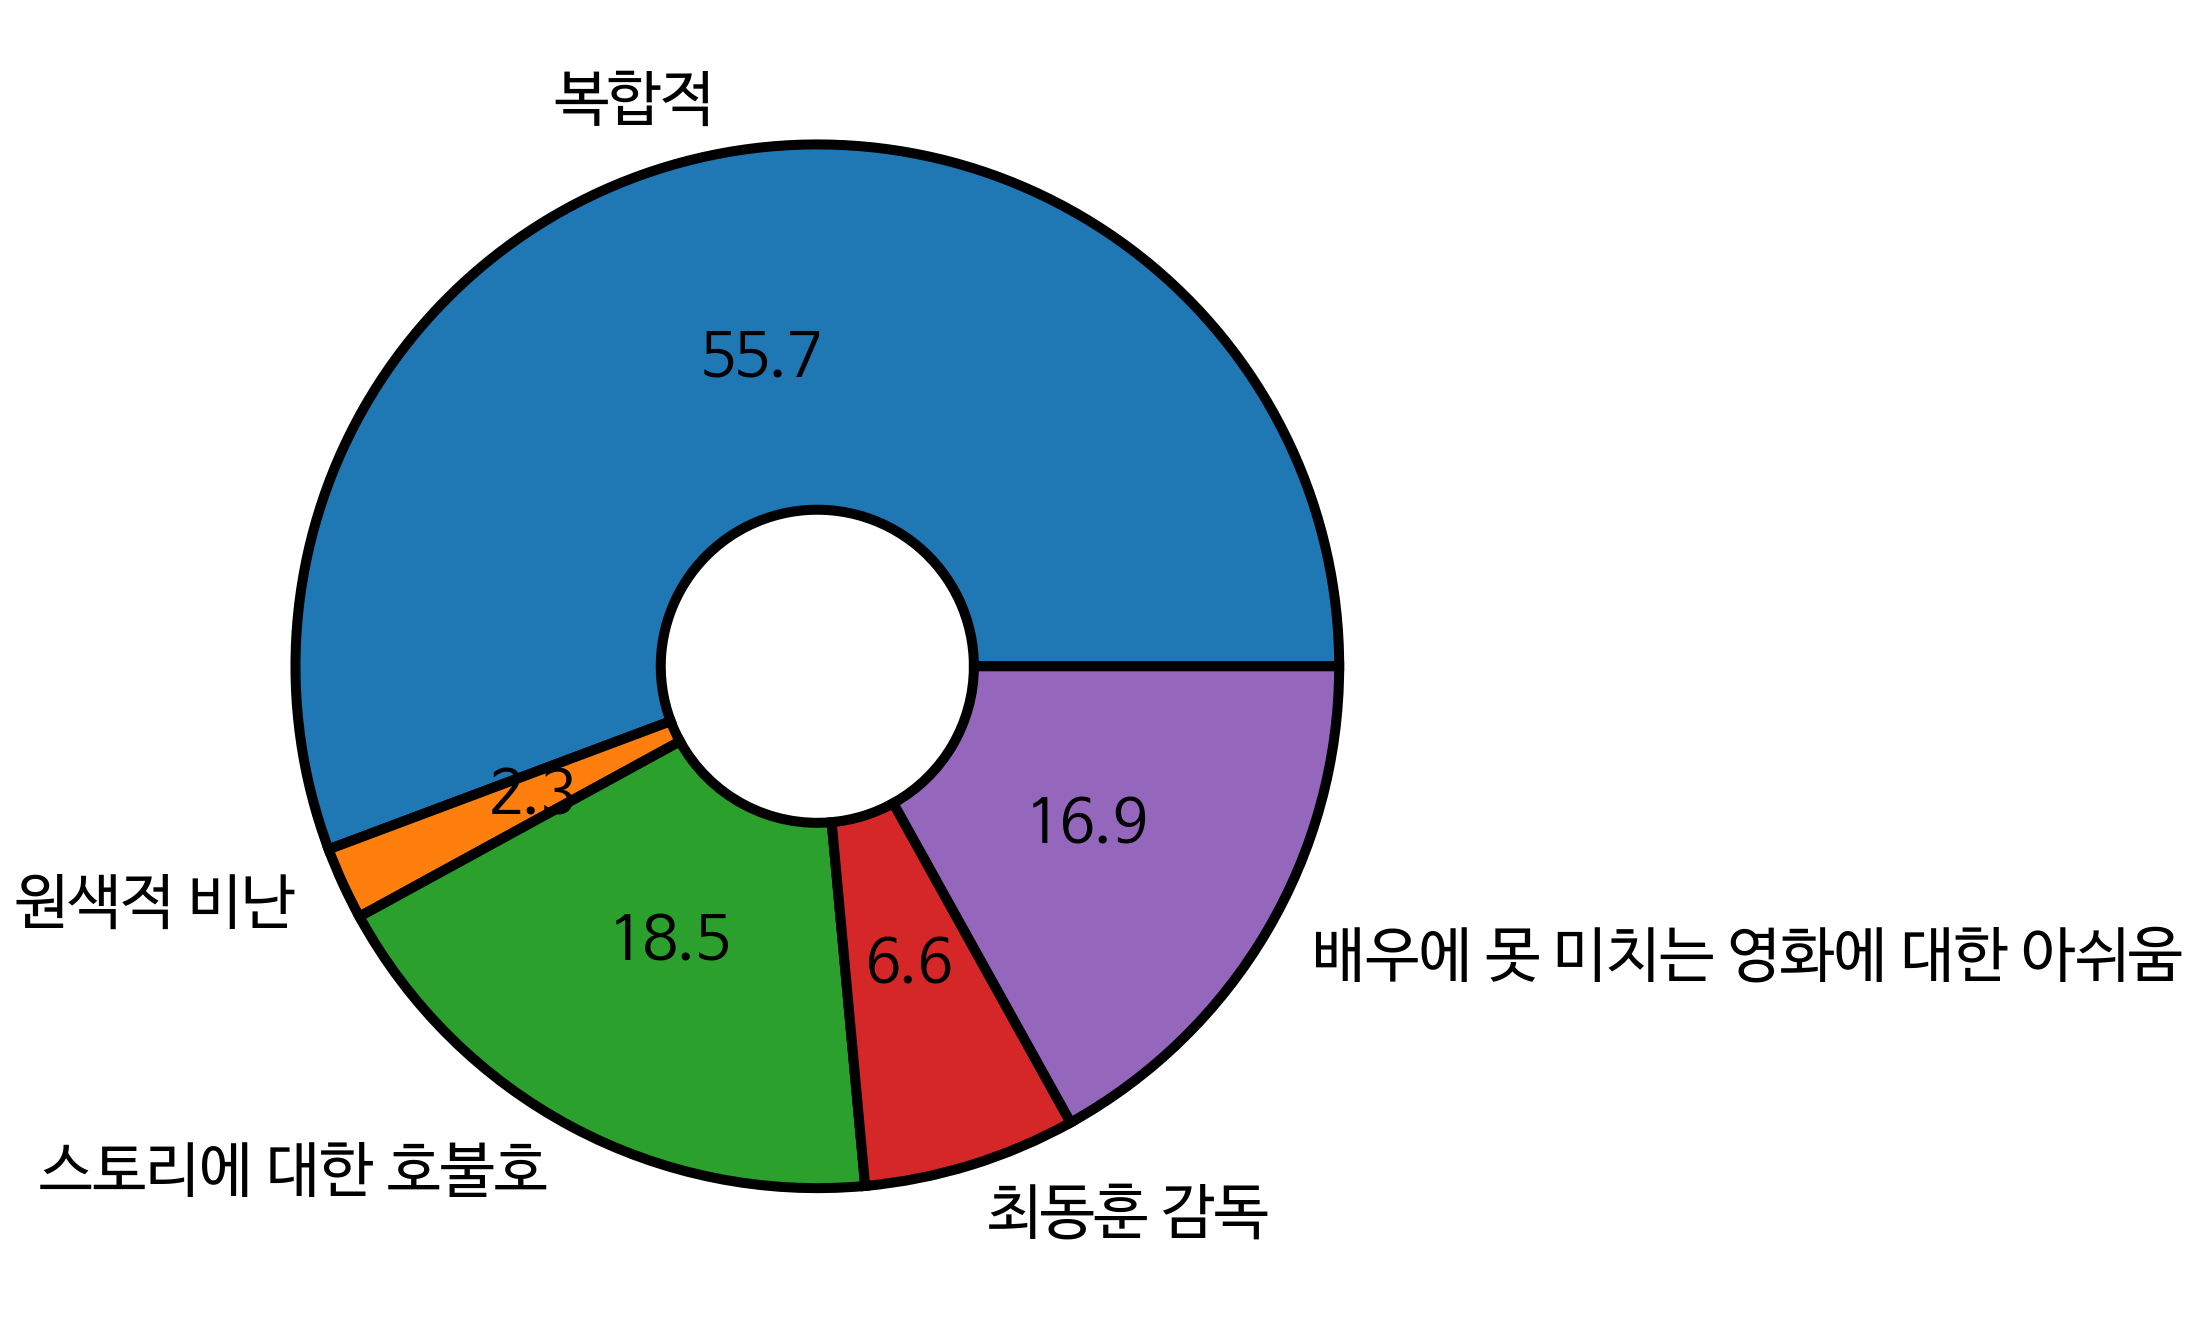

In [ ]:
ratio = movie_df['Ratio'].tolist()
labels = movie_df['Cat_Mean'].tolist()

plt.figure(figsize=(12,12))
plt.pie(ratio, labels=labels, autopct='%.1f', wedgeprops={'width': 0.7, 'edgecolor': 'black', 'linewidth': 5}, textprops={'fontsize': 30, 'color':'k'})
plt.show()

# 분류 모델 시도

## 비상선언

In [ ]:
bs = text2[['리뷰', 'label']]
bs.rename(columns={'리뷰':'review'}, inplace = True)
bs

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:5047: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,review,label
0,이건 아니다아이가? 진짜 돈은아깝지않지만 시간은 아까워,0
1,너무 재미없음 !! 감동도 재미도 없다,0
2,"보기 싫은 배우들, 뽀로로 수준의 ai 로봇 발성, 감독의 근자감. 감독은 수준 높...",3
3,여자친구랑 첫데이트였는데 여자친구 잤습니다 더이상 말 필요한가요,0
4,소지섭 류준열 김우빈 김태리 배우가 아까움 스토리 0 한국판 마블 짬뽕,2
...,...,...
1968,단 한순간의 긴장감도 없었다. 그냥 안타까울뿐...,0
1969,외계인에 대한 설정이 너무 아쉽네요. CG도 별로라 몰입을 방해함. 전체 스토리 설...,2
1970,다른건 다이해하겠는데 최동훈감독이 왜 이런 영화를 만든건지는 도무지 이해가 안간다,3
1971,배우들의 영화는 매우 훌륭했으나…영화가 다른 영화들의 비해 좀 평범했고 외계인의 c...,2


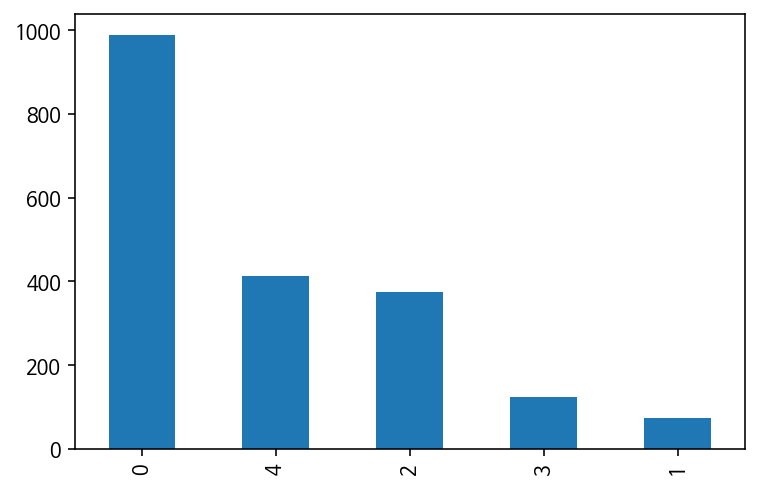

In [ ]:
bs['label'].value_counts().plot(kind='bar')

In [ ]:
print('각 라벨별 리뷰 개수')
print(bs.groupby('label').size().reset_index(name='count'))

각 라벨별 리뷰 개수
   label  count
0      0    989
1      1     73
2      2    374
3      3    125
4      4    412


In [ ]:
print(f'라벨 0의 비율 = {round(bs["label"].value_counts()[0]/len(bs) * 100,3)}%')
print(f'라벨 1일의 비율 = {round(bs["label"].value_counts()[1]/len(bs) * 100,3)}%')
print(f'라벨 2의 비율 = {round(bs["label"].value_counts()[2]/len(bs) * 100,3)}%')
print(f'라벨 3의 비율 = {round(bs["label"].value_counts()[3]/len(bs) * 100,3)}%')
print(f'라벨 4의 비율 = {round(bs["label"].value_counts()[4]/len(bs) * 100,3)}%')

라벨 0의 비율 = 50.127%
라벨 1일의 비율 = 3.7%
라벨 2의 비율 = 18.956%
라벨 3의 비율 = 6.336%
라벨 4의 비율 = 20.882%


In [ ]:
X_data = bs['review']
y_data = bs['label']

In [ ]:
with open('/content/drive/Shareddrives/22-여름 NLP 프로젝트/NLP프로젝트_최종/korean_stopwords.txt', encoding='utf-8') as f:
  stopwords = f.readlines()
stopwords = [x.strip() for x in stopwords]
stopwords.extend(['하다','이다','이에요','은','한','거','던','라','고','비상','선언','영화'])
stopwords.extend("아 휴 아이구 아이쿠 아이고 어 나 우리 저희 따라 의해 을 를 에 의 가 으로 로 에게 뿐이다 의거하여 근거하여 입각하여 기준으로 예하면 예를 들면 들자면 저 소인 소생 저희 다른 물론 또한 그리고 비길수 해서는 만이 막론하고 관계없이 그치지 타다 오르다 제외하고 하여야 비로소 한다면 몰라도 이곳 여기 부터 기점으로 따라서 이리하여 그리하여 그렇게 함으로써 중에서 보는데서 으로써 로써 까지 해야한다 일것이다 반드시 임에 한다면 등 등등 등등등 제 겨우 단지 다만 할뿐 딩동 댕그 대해서 대하여 대하면 훨씬 얼마나 얼마만큼 얼마큼 남짓 여 얼마간 약간 다소 좀 조금 다수 몇 얼마 지만 하물며 또한 이외에도 대해 말하자면 뿐이다 다음에 말하자면 이와 바꾸어서 말하면 한다면 만약 까악 툭 딱 보드득 비걱거리다 꽈당 응당 해야한다 에 가서 각 각각 여러분 각종 각자 제각기 하도록하다 와 과 그러므로 그래서 고로 한 까닭에 하기 때문에 거니와 이지만 대하여 관하여 관한 과연 실로 어떤 내 경우 명 생각 다시 이런 앞 보이 번 나 어떻 여자 개 전 들 사실 이렇 점 싶 말 정도 좀 원 통하 놓 ㅋ ㅋㅋ ㅋㅋㅋ ㅋㅋㅋㅋ ㅋㅋㅋㅋㅋ ㅋㅋㅋㅋㅋㅋ ㅎ ㅎㅎ ㅎㅎㅎ ㅎㅎㅎㅎ ㅎㅎㅎㅎㅎ ㅎㅎㅎㅎㅎㅎ ㅠ ㅠㅠ ㅠㅠㅠ ㅠㅠㅠㅠ ㅠㅠㅠㅠㅠ ㅠㅠㅠㅠㅠㅠ . .. ... .... ..... ...... / - ' ? ! ?? ??? ???? ????? ?! !? !! !!! !!!! !!!!! ^^ . , # $ % \ ' ( ) * + - / : ; < = > @ [ \ \ ] ^ _ ` { | } ~ " " “ ” ’ ".split())
spacing = Spacing()


def preprocessing(review,okt,remove_stopwords=False,stop_words=[]):

  review = spacing(review)
  review_text = re.sub('[^ㄱ-ㅣ가-힣]+',' ',review)
  # word_tokenize
  word_review = okt.morphs(review_text,stem=True)
  word_review_noun = ' '.join([word[0] for word in okt.pos(review_text) if word[1] == 'Noun'])
  # stop_words
  if remove_stopwords:
    word_review = [token for token in word_review if not token in stop_words]
  return word_review, word_review_noun

In [ ]:
stop_words = stopwords
okt = Okt()

In [ ]:
# X_data에 대해 okt(), stopword 처리한 토큰
clean_review = []
noun_review = []
for review in tqdm(X_data):
  if type(review) == str:
    clean, noun = preprocessing(review,okt,remove_stopwords=True,stop_words=stopwords)
    clean_review.append(clean)
    noun_review.append(noun)
  else:
    clean_review.append([])

100%|██████████| 1973/1973 [02:14<00:00, 14.63it/s]


In [ ]:
X_data = clean_review

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=0.2, random_state=0, stratify=y_data)

In [ ]:
model = SentenceTransformer('sentence-transformers/xlm-r-100langs-bert-base-nli-stsb-mean-tokens')

In [ ]:
X_train_encoded = model.encode(X_train)

In [ ]:
print(X_train_encoded[:5])

[[ 0.13259183  0.06459875  1.9383794  ...  0.1231984  -0.11843879
   0.22084567]
 [-0.0394167   0.21373586  1.686894   ...  0.18082239 -0.00656891
   0.19821844]
 [-0.09597544 -0.08509388  1.6792952  ...  0.30506998 -0.00615788
   0.0459741 ]
 [ 0.2262287  -0.03604938  1.0919716  ... -0.14851005 -0.16016217
  -0.57952344]
 [ 0.05421215 -0.13143729  2.107971   ...  0.16194996 -0.17916478
   0.06340978]]


In [ ]:
vocab = {}
preprocessed_sentences = []

for sentence in X_train:
    # 단어 토큰화

    for word in sentence: 
      if word not in vocab:
        vocab[word] = 0 
      vocab[word] += 1
print(vocab)

{'살다': 16, '빨리': 8, '집': 17, '가다': 144, '싶다': 131, '악당': 3, '빠딱': 1, '죽다': 10, '바랬던': 1, '는': 293, '첨': 8, '자네': 1, '우뢰매': 7, '라고': 28, '들다': 79, '보다': 734, '덥다': 2, '첫': 9, '지루하다': 67, '따분': 1, '볼': 89, '만': 192, '끝나다': 66, '편': 72, '최근': 7, '간': 30, '중': 59, '젤': 4, '별로': 37, '배우': 215, '고생': 7, '줍다': 5, '알바': 57, '빼다': 7, '평점': 69, '수렴': 1, '만에': 16, '성냥': 10, '팔이': 10, '소녀': 10, '후속작': 5, '나오다': 198, '부': 56, '기대': 45, '되다': 195, '사람': 99, '마블': 33, '라는': 20, '다': 220, '패': 2, '화가': 8, '나다': 37, '너무': 269, '많다': 89, '걸': 94, '보여주다': 24, '난해하다': 11, '만들다': 196, '우치': 8, '못': 110, '안타깝다': 13, '년대': 13, '초반': 16, '수준': 39, '와이어': 8, '씬들': 1, '계속': 28, '눈': 24, '거슬리다': 3, '외계': 19, '인': 87, '이란': 3, '제목': 3, '처럼': 21, '이야기': 25, '하고': 52, '겉돈': 1, '중간': 76, '잠들다': 12, '스토리': 175, '이어지다': 7, '요': 71, '쓸데없다': 3, '장면': 40, '평생': 4, '최악': 72, '초등': 1, '학년': 1, '면': 31, '만족하다': 2, '수도': 11, '주제': 5, '도': 452, '없다': 327, '줄거리': 5, '맥락': 3, '결말': 16, '웃기다': 25, '않다': 132, '유치': 13, '찬란하다': 3,

In [ ]:
vocab_sorted = sorted(vocab.items(), key = lambda x:x[1], reverse = True)
print(vocab_sorted)

[('보다', 734), ('도', 452), ('없다', 327), ('는', 293), ('너무', 269), ('안', 255), ('돈', 234), ('다', 220), ('배우', 215), ('진짜', 200), ('나오다', 198), ('감독', 197), ('만들다', 196), ('되다', 195), ('만', 192), ('게', 190), ('아깝다', 188), ('스토리', 175), ('가다', 144), ('않다', 132), ('싶다', 131), ('좋다', 129), ('아니다', 124), ('그냥', 124), ('듯', 117), ('자다', 112), ('못', 110), ('재밌다', 107), ('느낌', 106), ('이렇다', 103), ('전우치', 102), ('사람', 99), ('더', 97), ('걸', 94), ('보고', 93), ('수', 91), ('내용', 90), ('볼', 89), ('많다', 89), ('건', 88), ('인', 87), ('처음', 87), ('적', 85), ('최동훈', 82), ('모르다', 81), ('들다', 79), ('재미없다', 78), ('중간', 76), ('재미', 76), ('오다', 76), ('외계인', 73), ('편', 72), ('최악', 72), ('정말', 72), ('요', 71), ('평점', 69), ('지루하다', 67), ('연기', 67), ('끝나다', 66), ('님', 66), ('이렇게', 64), ('많이', 63), ('유치하다', 61), ('중', 59), ('주다', 59), ('알바', 57), ('부', 56), ('인지', 56), ('말다', 56), ('분', 54), ('하고', 52), ('중국', 50), ('뭐', 48), ('나가다', 48), ('한국', 47), ('줄', 47), ('지다', 46), ('기대', 45), ('기', 45), ('이나', 45), ('액션', 44), (

In [ ]:
word_to_index = {}
i = 0
for (word, frequency) in vocab_sorted :
      i = i + 1
      word_to_index[word] = i

print(word_to_index)

{'보다': 1, '도': 2, '없다': 3, '는': 4, '너무': 5, '안': 6, '돈': 7, '다': 8, '배우': 9, '진짜': 10, '나오다': 11, '감독': 12, '만들다': 13, '되다': 14, '만': 15, '게': 16, '아깝다': 17, '스토리': 18, '가다': 19, '않다': 20, '싶다': 21, '좋다': 22, '아니다': 23, '그냥': 24, '듯': 25, '자다': 26, '못': 27, '재밌다': 28, '느낌': 29, '이렇다': 30, '전우치': 31, '사람': 32, '더': 33, '걸': 34, '보고': 35, '수': 36, '내용': 37, '볼': 38, '많다': 39, '건': 40, '인': 41, '처음': 42, '적': 43, '최동훈': 44, '모르다': 45, '들다': 46, '재미없다': 47, '중간': 48, '재미': 49, '오다': 50, '외계인': 51, '편': 52, '최악': 53, '정말': 54, '요': 55, '평점': 56, '지루하다': 57, '연기': 58, '끝나다': 59, '님': 60, '이렇게': 61, '많이': 62, '유치하다': 63, '중': 64, '주다': 65, '알바': 66, '부': 67, '인지': 68, '말다': 69, '분': 70, '하고': 71, '중국': 72, '뭐': 73, '나가다': 74, '한국': 75, '줄': 76, '지다': 77, '기대': 78, '기': 79, '이나': 80, '액션': 81, '관객': 82, '노잼': 83, '보지': 84, '알다': 85, '연출': 86, '이건': 87, '장면': 88, '쓰다': 89, '성': 90, '그렇다': 91, '수준': 92, '뭔': 93, '과거': 94, '넣다': 95, '느끼다': 96, '임': 97, '별로': 98, '나다': 99, '인데': 100, '개연': 101, '버

In [ ]:
vocab_size = len(word_to_index) + 1

In [ ]:
encoded_sentences = []
for sentence in X_train:
    encoded_sentence = []
    for word in sentence:
        try:
            # 단어 집합에 있는 단어라면 해당 단어의 정수를 리턴.
            encoded_sentence.append(word_to_index[word])
        except KeyError:
            # 만약 단어 집합에 없는 단어라면 'OOV'의 정수를 리턴.
            encoded_sentence.append(word_to_index['OOV'])
    encoded_sentences.append(encoded_sentence)
print(encoded_sentences)

[[257, 257, 487, 242, 19, 21, 1034, 1848, 409, 1849, 4, 488], [1850, 547, 144, 46, 1, 1309], [445, 57, 1851, 38, 15, 21, 59, 52, 548, 136, 1, 64, 845, 98], [9, 549, 706, 66, 550, 56, 1852, 258, 410, 411, 412, 707, 11], [67, 78, 14, 32, 121, 206, 32, 8, 1310, 21, 489, 99], [5, 39, 34, 169, 57, 373, 13, 490, 27, 1, 325, 326, 259, 92, 491, 1853, 145, 170, 1035], [219, 41, 1036, 1037, 194, 159, 14, 27, 71, 1854, 8], [1, 48, 343, 18, 551, 55, 1038, 88, 39], [846, 53, 1855, 1856, 131, 1311, 374, 708, 2, 3, 709, 2, 3, 1039, 2, 3, 260, 2, 3, 160, 20, 327, 1040, 17, 7, 15, 243, 154, 328], [299, 278, 344, 1312, 1, 49, 244], [710, 257, 231, 49, 3, 7, 17, 16, 125, 18, 92, 1, 10, 161, 33, 612], [711, 4, 847, 122, 18, 57, 279, 613, 2, 3, 300, 301, 614, 615], [1041, 1857, 848, 1858, 8, 1313, 146, 1314], [245, 150, 36, 206, 849, 46], [72, 492, 6, 552, 9, 3, 1859, 302, 195, 413, 72, 110, 329], [50, 4, 1315, 1316, 1042, 63, 27, 1860, 1317], [111, 38, 2, 6, 26, 1, 1043, 26], [1, 48, 11, 43, 26, 3, 1318, 

In [ ]:
max(len(sent) for sent in encoded_sentences)

41

In [ ]:
max_len = 41
X_train_padded = pad_sequences(encoded_sentences, maxlen = max_len)
print("훈련 데이터의 크기(shape):", X_train_padded.shape)

훈련 데이터의 크기(shape): (1578, 41)


In [ ]:
X_train_padded

array([[   0,    0,    0, ..., 1849,    4,  488],
       [   0,    0,    0, ...,   46,    1, 1309],
       [   0,    0,    0, ...,   64,  845,   98],
       ...,
       [   0,    0,    0, ...,   38,  736,  393],
       [   0,    0,    0, ...,    2,    1,  249],
       [   0,    0,    0, ..., 3775,    1,  673]], dtype=int32)

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Embedding
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.models import load_model

In [ ]:
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [ ]:
from tensorflow.keras.layers import SimpleRNN, Embedding, Dense, LSTM
from tensorflow.keras.models import Sequential

embedding_dim = 128
hidden_units = 128
num_classes = 5

testmodel = Sequential()
testmodel.add(Embedding(vocab_size, embedding_dim))
testmodel.add(LSTM(hidden_units))
testmodel.add(Dense(num_classes, activation='softmax'))

testmodel.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['acc'])
history = testmodel.fit(X_train_padded, y_train, epochs=10, batch_size=64, validation_split=0.2)

Epoch 1/10
20/20 [==============================] - 5s 116ms/step - loss: 1.4116 - acc: 0.4810 - val_loss: 1.3080 - val_acc: 0.5127
Epoch 2/10
20/20 [==============================] - 2s 94ms/step - loss: 1.2567 - acc: 0.4984 - val_loss: 1.2326 - val_acc: 0.5127
Epoch 3/10
20/20 [==============================] - 2s 90ms/step - loss: 1.1359 - acc: 0.5365 - val_loss: 1.1336 - val_acc: 0.5316
Epoch 4/10
20/20 [==============================] - 2s 123ms/step - loss: 0.7925 - acc: 0.7116 - val_loss: 1.0545 - val_acc: 0.5918
Epoch 5/10
20/20 [==============================] - 3s 170ms/step - loss: 0.5058 - acc: 0.8455 - val_loss: 0.9636 - val_acc: 0.6709
Epoch 6/10
20/20 [==============================] - 2s 91ms/step - loss: 0.3300 - acc: 0.9025 - val_loss: 1.0426 - val_acc: 0.6519
Epoch 7/10
20/20 [==============================] - 2s 90ms/step - loss: 0.2045 - acc: 0.9548 - val_loss: 1.0489 - val_acc: 0.6709
Epoch 8/10
20/20 [==============================] - 2s 91ms/step - loss: 0.1267 

Validation accuracy 약 70퍼!

In [ ]:
X_test_encoded = model.encode(X_test)

In [ ]:
vocab = {}
preprocessed_sentences = []

for sentence in X_test:
    # 단어 토큰화

    for word in sentence: 
      if word not in vocab:
        vocab[word] = 0 
      vocab[word] += 1
print(vocab)

{'중국': 17, '자본': 7, '들어가다': 6, '뭔가': 8, '난': 5, '잡함': 1, '느껴지다': 3, '아쉽다': 8, '배우진': 1, '보고': 31, '망설이다': 1, '없이': 2, '보다': 184, '근': 1, '새': 2, '안': 48, '듯': 22, '갈다': 3, '돈': 51, '맛있다': 5, '들다': 20, '기부': 1, '게': 52, '낫다': 5, '홍콩': 2, '만남': 1, '새롭다': 3, '시도': 5, '인데': 12, '재미있다': 7, '않다': 33, '정말': 17, '만에': 3, '중간': 18, '뛰다': 3, '치다': 7, '나오다': 36, '중': 14, '절대': 2, '보지': 13, '말다': 14, '초등학생': 1, '급': 8, '거대': 1, '들이다': 2, '기획': 1, '연출': 12, '마케팅': 1, '모든': 8, '부분': 6, '다': 62, '안일하다': 1, '투성이': 1, '인지': 13, '차다': 4, '이해': 10, '되다': 47, '질': 3, '사극': 6, '판타지': 1, '많이': 19, '결합': 1, '자연': 1, '스럽지': 1, '못': 20, '하고': 11, '복잡하다': 2, '재밌다': 20, '재미없다': 24, '상한': 4, '이렇다': 20, '장으': 1, '후': 5, '좋다': 33, '한국': 7, '볼': 17, '날': 5, '기대': 11, '배우': 61, '님': 8, '연기': 20, '만': 39, '진짜': 60, '내내': 9, '암': 5, '걸리다': 4, '아침': 1, '조조': 3, '할인': 1, '받다': 8, '아깝다': 44, '움': 8, '킬링타임': 4, '도': 94, '캐스팅': 8, '재미': 25, '없다': 73, '루즈': 1, '함': 8, '따다': 4, '걸': 19, '백': 1, '추천': 9, 'ㄹㅇ': 2, '첨': 5, '엔': 

In [ ]:
vocab_sorted = sorted(vocab.items(), key = lambda x:x[1], reverse = True)
print(vocab_sorted)

[('보다', 184), ('도', 94), ('없다', 73), ('너무', 73), ('다', 62), ('는', 62), ('배우', 61), ('진짜', 60), ('스토리', 54), ('게', 52), ('돈', 51), ('안', 48), ('되다', 47), ('아깝다', 44), ('감독', 43), ('가다', 42), ('만들다', 42), ('만', 39), ('아니다', 37), ('나오다', 36), ('그냥', 36), ('싶다', 35), ('않다', 33), ('좋다', 33), ('보고', 31), ('내용', 31), ('전우치', 29), ('느낌', 27), ('수', 26), ('주다', 26), ('처음', 26), ('건', 26), ('재미', 25), ('재미없다', 24), ('최동훈', 24), ('평점', 24), ('더', 24), ('자다', 23), ('듯', 22), ('오다', 22), ('지루하다', 22), ('요', 22), ('많다', 21), ('들다', 20), ('못', 20), ('재밌다', 20), ('이렇다', 20), ('연기', 20), ('많이', 19), ('걸', 19), ('모르다', 19), ('중간', 18), ('최악', 18), ('인', 18), ('사람', 18), ('중국', 17), ('정말', 17), ('볼', 17), ('끝나다', 17), ('기대하다', 17), ('알바', 16), ('별', 16), ('적', 15), ('이렇게', 15), ('중', 14), ('말다', 14), ('유치하다', 14), ('보지', 13), ('인지', 13), ('데', 13), ('편', 13), ('영화관', 13), ('그렇다', 13), ('먹다', 13), ('노잼', 13), ('인데', 12), ('연출', 12), ('나다', 12), ('다가', 12), ('기', 12), ('액션', 12), ('하고', 11), ('기대', 11), ('

In [ ]:
word_to_index = {}
i = 0
for (word, frequency) in vocab_sorted :
      i = i + 1
      word_to_index[word] = i

print(word_to_index)

{'보다': 1, '도': 2, '없다': 3, '너무': 4, '다': 5, '는': 6, '배우': 7, '진짜': 8, '스토리': 9, '게': 10, '돈': 11, '안': 12, '되다': 13, '아깝다': 14, '감독': 15, '가다': 16, '만들다': 17, '만': 18, '아니다': 19, '나오다': 20, '그냥': 21, '싶다': 22, '않다': 23, '좋다': 24, '보고': 25, '내용': 26, '전우치': 27, '느낌': 28, '수': 29, '주다': 30, '처음': 31, '건': 32, '재미': 33, '재미없다': 34, '최동훈': 35, '평점': 36, '더': 37, '자다': 38, '듯': 39, '오다': 40, '지루하다': 41, '요': 42, '많다': 43, '들다': 44, '못': 45, '재밌다': 46, '이렇다': 47, '연기': 48, '많이': 49, '걸': 50, '모르다': 51, '중간': 52, '최악': 53, '인': 54, '사람': 55, '중국': 56, '정말': 57, '볼': 58, '끝나다': 59, '기대하다': 60, '알바': 61, '별': 62, '적': 63, '이렇게': 64, '중': 65, '말다': 66, '유치하다': 67, '보지': 68, '인지': 69, '데': 70, '편': 71, '영화관': 72, '그렇다': 73, '먹다': 74, '노잼': 75, '인데': 76, '연출': 77, '나다': 78, '다가': 79, '기': 80, '액션': 81, '하고': 82, '기대': 83, '눈': 84, '지': 85, '대사': 86, '부': 87, '난방': 88, 'ㅜㅜ': 89, '전개': 90, '버리다': 91, '대다': 92, '작품': 93, '줄': 94, '이해': 95, '캐릭터': 96, '외계인': 97, '중구': 98, '산만하다': 99, '두': 100, '화보': 1

In [ ]:
encoded_sentences = []
for sentence in X_test:
    encoded_sentence = []
    for word in sentence:
        try:
            # 단어 집합에 있는 단어라면 해당 단어의 정수를 리턴.
            encoded_sentence.append(word_to_index[word])
        except KeyError:
            # 만약 단어 집합에 없는 단어라면 'OOV'의 정수를 리턴.
            encoded_sentence.append(word_to_index['OOV'])
    encoded_sentences.append(encoded_sentence)
print(encoded_sentences)

[[56, 145, 173, 118, 200, 704, 328, 119, 705, 25, 706, 448, 1, 707, 449, 1, 12, 173, 39], [1, 329, 11, 201, 44, 708, 10, 202], [450, 709, 330, 203, 76, 146, 23], [57, 331, 52, 1, 332, 147, 20, 65, 65, 451, 68, 66, 710, 120], [711, 145, 452, 712, 77, 713, 121, 174, 5, 714, 715, 69, 257, 95, 13, 333, 23], [175, 716, 49, 717, 718, 719, 45, 82, 453, 46, 34, 23, 258, 47, 720, 49, 20, 204, 24, 148, 58, 205, 83], [7, 122, 44, 48, 18, 24, 8, 1, 103, 206, 259, 721, 334, 722, 123, 1, 8, 11, 14, 14, 124, 260, 2, 12, 13], [7, 125, 24, 33, 3, 723, 126, 261, 1, 50, 724, 104, 126], [454, 207, 176, 46, 118, 335, 29, 3, 455, 2, 456, 6, 336, 1, 84, 457, 262, 5, 46, 26, 69, 127, 128, 85, 51, 40, 78, 725, 20, 458, 9, 726, 29], [263, 459, 1, 727, 79, 460, 41, 149, 59, 264, 129, 35, 15, 728, 86, 729, 96, 208, 461, 462, 23, 730, 7, 48, 731, 6, 28, 1], [118, 105, 3, 41, 87, 58, 29], [732, 50, 11, 30, 1, 150], [40, 8, 209, 53, 733, 5, 734, 16, 735, 463, 464, 151, 152, 153, 265, 5, 463, 464], [6, 31, 465, 130, 

In [ ]:
max(len(sent) for sent in encoded_sentences)

41

In [ ]:
max_len = 41
X_test_padded = pad_sequences(encoded_sentences, maxlen = max_len)
print("훈련 데이터의 크기(shape):", X_test_padded.shape)

훈련 데이터의 크기(shape): (395, 41)


In [ ]:
print("\n 테스트 정확도: %.4f" % (testmodel.evaluate(X_test_padded, y_test)[1]))

13/13 [==============================] - 0s 29ms/step - loss: 2.5337 - acc: 0.4253

 테스트 정확도: 0.4253


test accuracy가 너무 낮다